## 와인 퀄리티 예측하기
- 텐서플로로 와인 퀄리티를 예측하는 모델을 핏팅한 후 성능(R**2) 을 측정하세요

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
path = 'C:/Users/User/Downloads/winequality-red.csv'
df = pd.read_csv(path, sep=';')
df.shape

(1599, 12)

In [ ]:
df.isna().sum().sum()

In [ ]:
p = df.boxplot(figsize=(15,2))

In [117]:
x = df.drop(columns='quality').values
y = df['quality'].values.reshape([-1, 1]).astype(np.float32)
x.shape, y.shape

((1599, 11), (1599, 1))

In [118]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(x) 
scaler_y = StandardScaler().fit(y) 
x_n = scaler.transform(x) # 정규화 (X - x_min) / x_std
y_n = scaler_y.transform(y)

In [119]:
X = tf.placeholder(tf.float32, [None, 11])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal(shape=[11, 1], seed=1))
b = tf.Variable(0.0)
h = tf.matmul(X, W) + b
cost = tf.reduce_mean((Y-h)**2 )
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = [] 

In [ ]:
from sklearn.metrics import r2_score
for i in range(1000):
    _, _cost = sess.run([train, cost], {X:x_n, Y:y_n})
    cost_list.append(_cost)
acc = r2_score(y_n,  sess.run(h, {X:x_n} ))
plt.title('r2 ' + str(acc))
p = plt.plot(cost_list)

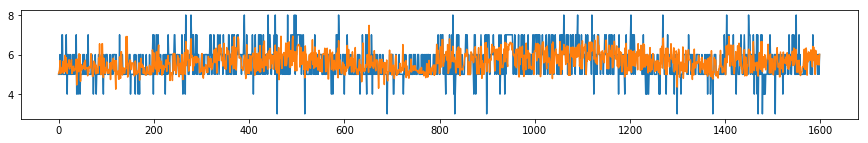

In [116]:
plt.figure(figsize=(15,2))
plt.plot(y)
plt.plot(scaler_y.inverse_transform(sess.run(h, {X:x_n})))